# Retail Giant Sales Forecasting Assignment
 

## Business Objective
Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.

As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

### 1. Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Setting display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 2. Data Sourcing

In [3]:
# Reading the dataset
df1 = pd.read_csv('Global+Superstore+Data.csv')
df1.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
# Checking the number of rows and columns in the dataframe
df1.shape

(51290, 5)

In [5]:
# Checking the column-wise info of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [6]:
# Check the summary for the numeric columns 
df1.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [7]:
# Checking total null values in dataframe
print('\nTotal number of null values in the dataframe: ',df1.isnull().sum().sum())


Total number of null values in the dataframe:  0


### 3. Data understanding and preparation

In [8]:
# Creating new column Market_Segment
df1['Market_Segment'] = df1['Market']+'_'+df1['Segment']
df1.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [9]:
# Finding unique values
df1.nunique().sort_values()

Segment               3
Market                7
Market_Segment       21
Order Date         1430
Sales             22995
Profit            24575
dtype: int64

##### Observation:
- The store caters to 7 different geographical market segments and 3 major customer segments.
- There are 21 unique Market-Segments.

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


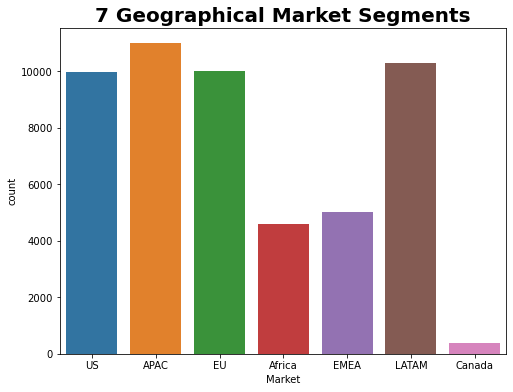

In [10]:
# Checking the unique market segments, customer segments and Market-Segments
plt.figure(figsize=(8, 6))
print(df1.Market.value_counts())
sns.countplot(df1['Market'])
plt.title('7 Geographical Market Segments', fontweight='bold', size=20)
plt.show()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


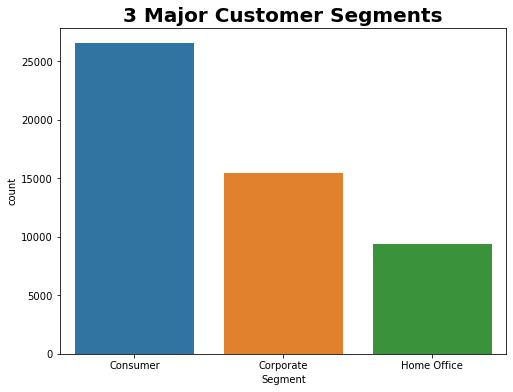

In [11]:
plt.figure(figsize=(8, 6))
print(df1.Segment.value_counts())
sns.countplot(df1['Segment'])
plt.title('3 Major Customer Segments', fontweight='bold', size=20)
plt.show()

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segment, dtype: int64


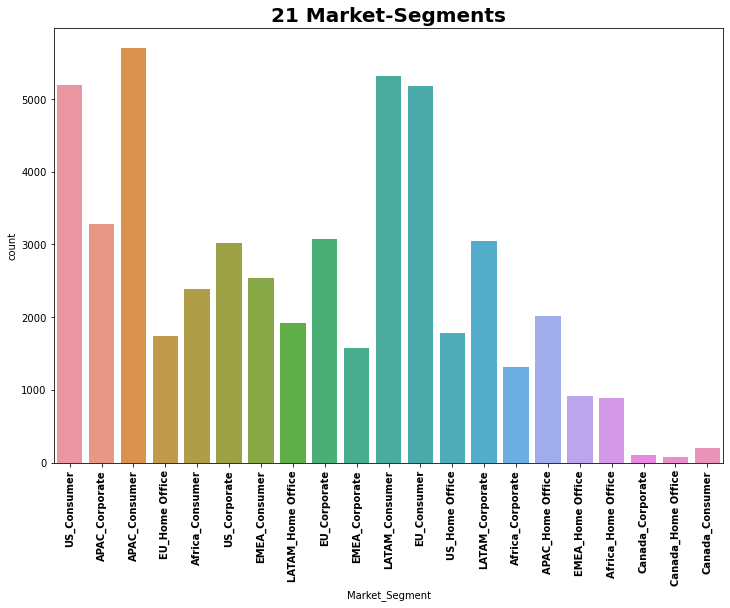

In [12]:
plt.figure(figsize=(12, 8))
print(df1.Market_Segment.value_counts())
sns.countplot(df1['Market_Segment'])
plt.title('21 Market-Segments', fontweight='bold', size=20)
plt.xticks(rotation=90, fontweight='bold')
plt.show()

##### Observation:
APAC_Consumer has the highest count.

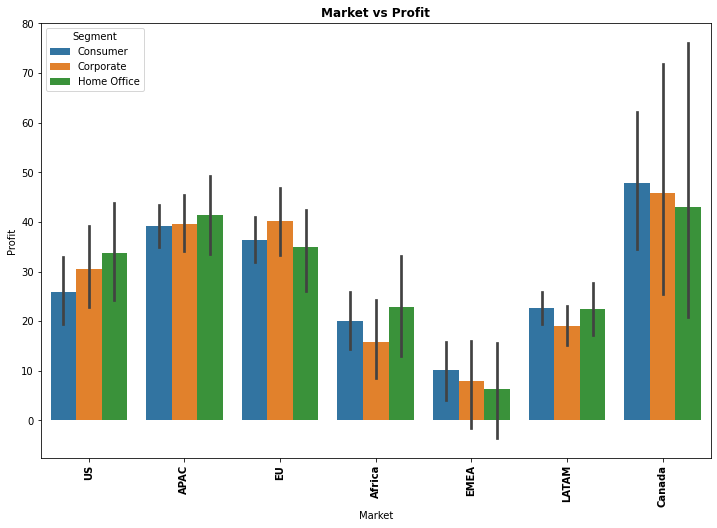

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=df1)
plt.title('Market vs Profit', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

##### Observation:
- Canada and APAC markets have more profit.
- Africa and EMEA markets have less profit.

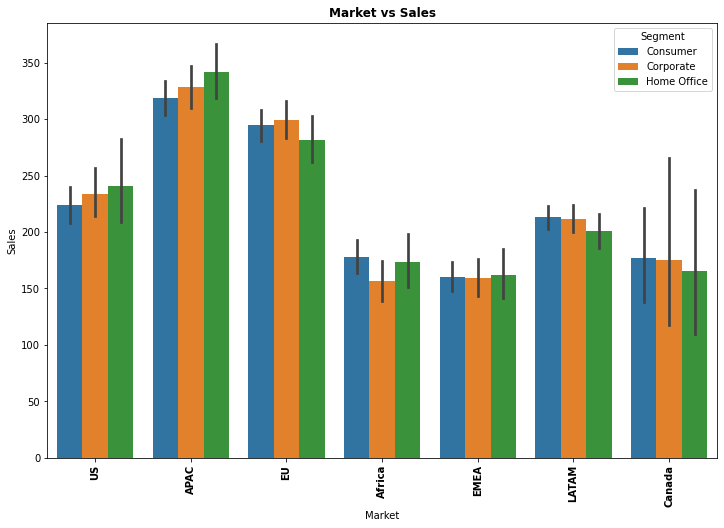

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=df1)
plt.title('Market vs Sales', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

##### Observation:
- APAC market has higher Sales.
- EMEA and Africa have less Sales.

In [15]:
# Dropping columns Market and Segment
df2= df1.drop(['Market','Segment'],axis =1)
df2.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


In [16]:
# Order date is converted into a date-time format for getting it into the Month-year format
df2['Order Date'] = pd.to_datetime(df2['Order Date']).dt.to_period('m')
df2= df2.sort_values(by=['Order Date'])
df2.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Sales           51290 non-null  float64  
 2   Profit          51290 non-null  float64  
 3   Market_Segment  51290 non-null  object   
dtypes: float64(2), object(1), period[M](1)
memory usage: 2.0+ MB


In [18]:
# Monthly aggregated transaction data
df2_profit= df2.pivot_table( index='Order Date',values='Profit', columns='Market_Segment' ,aggfunc='sum')
df2_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,EMEA_Corporate,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,555.426,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,1067.562,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,698.502,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,178.314,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,964.140,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [19]:
df2_profit.shape

(48, 21)

##### Observation:
We now have data for 48 months for the 21 Market_Segments.

#### Train-Test Split

In [20]:
# Train-test split with 42 months as the train data and 6 months as the test data.
train_len = 42
train = df2_profit[0:train_len] # first 42 months as training set
test = df2_profit[train_len:] # last 6 months as test set

In [21]:
train.shape

(42, 21)

In [22]:
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,EMEA_Corporate,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,555.426,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,1067.562,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,698.502,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,178.314,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,964.140,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


#### Calculate the CoV on the profit for each of the 21 market segments on the train data.

- We compare the variance between the segments using the coefficient of variation which normalises the standard deviation with the mean and gives a comparative figure on the basis of which we identify the most profitable market segment.
- We want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.

In [23]:
mean=np.mean(train)
std= np.std(train)

CoV_df= pd.DataFrame(mean)
CoV_df['std']= std
CoV_df['CoV'] = std/mean
CoV_df= CoV_df.reset_index()
CoV_df.columns= ['Market_Segment', 'Mean', 'Std', 'CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

,Market_Segment,Mean,Std,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


In [24]:
Lowest_CoV_value =min(CoV_df["CoV"])
Lowest_CoV_value

0.5227250555218101

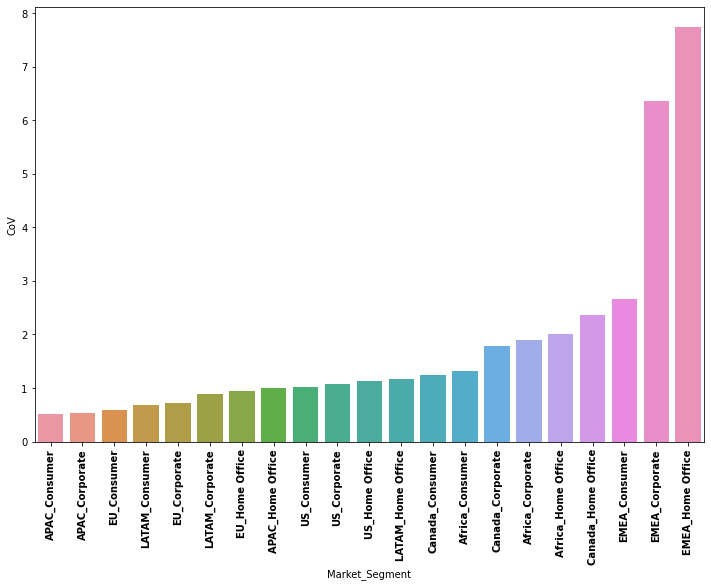

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x='Market_Segment', y= 'CoV', data=CoV_df)
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

##### Observation:
- The Lowest CoV is 0.52272 and its corresponding Market Segment "APAC_Consumer" is the most profitable.

#### Convert the Order-Date column from "DateTime" to "timestamp"

In [26]:
df2['Order Date'].dtype

period[M]

In [27]:
df2['Order Date'] = df2['Order Date'].astype(str)
df2['Order Date'] = pd.to_datetime(df2['Order Date'])

In [28]:
df2['Order Date'].dtype

dtype('<M8[ns]')

##### Observation:
- We now get a timestamp for each order date.

#### Filter the Data for Best Market Segment- APAC Consumer

In [29]:
# Drop the data for the rest 20 market segments and keep only the one for the market segment that you found to be the most consistently profitable.
retail_df= df2[(df2.Market_Segment=='APAC_Consumer')]
retail_df.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


In [30]:
retail_df.shape

(5699, 4)

#### Grouping data based on Order date and finding sales

In [31]:
df3=pd.DataFrame(retail_df.groupby("Order Date")['Sales'].sum())
df3.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [32]:
df3.shape

(48, 1)

### 4. Time Series Analysis

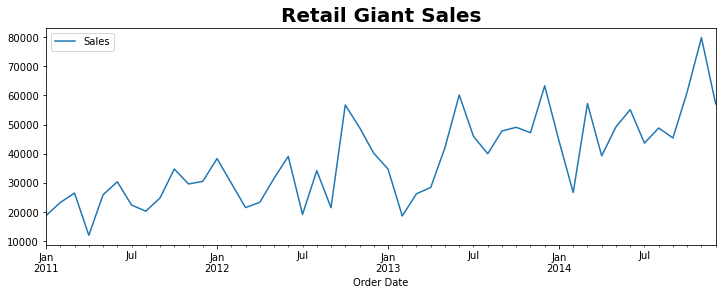

In [33]:
# Plotting the time series data
df3.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold', size=20)
plt.show(block=False)

In [34]:
df3.isnull().sum()

Sales    0
dtype: int64

##### Observation:
There are no missing values.

In [35]:
# Split time series data into training and test set
train_len = 42
train = df3[0:train_len] # first 42 months as training set
test = df3[train_len:] # last 6 months as out-of-time test set

#### Time Series Decomposition

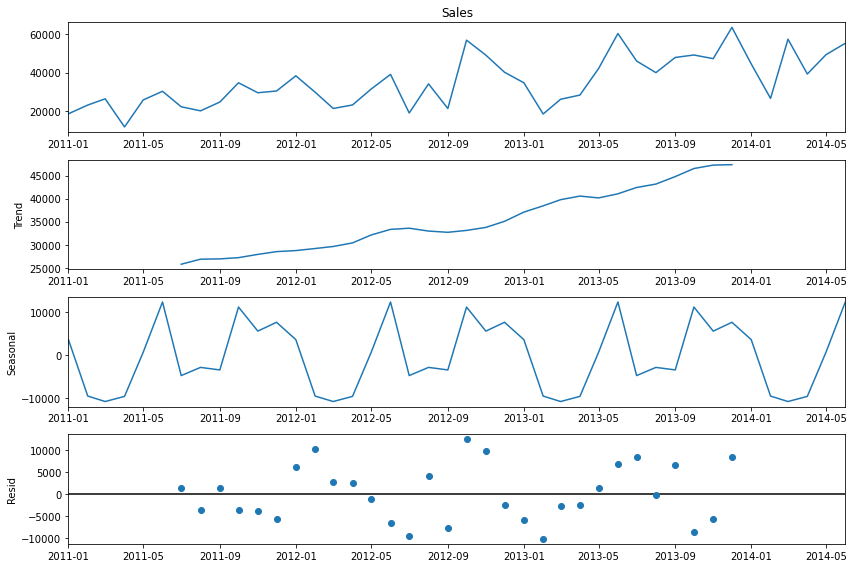

In [36]:
# Additive Seasonal Decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

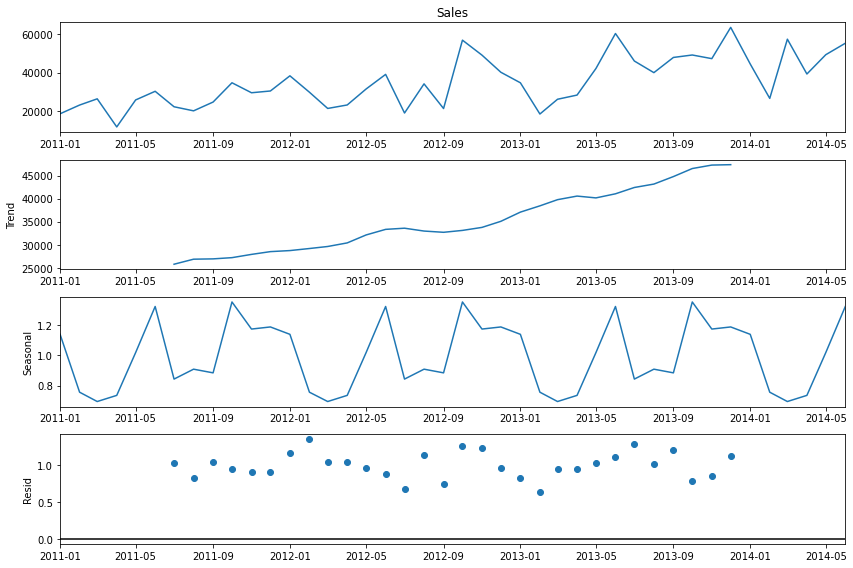

In [37]:
# Multiplicative seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

### 5. Build and Evaluate Time Series Forecast

#### Naive Method
Forecast = Last Month's Sales

In [38]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1] #Last observation in the train data

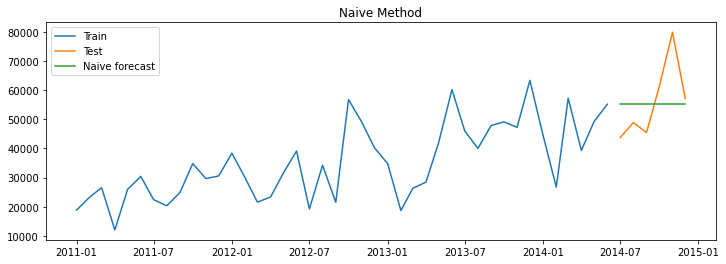

In [39]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

##### Observation:
- To forecast the sales from month 2014-07 to 2015-01 we consider the last or previous month data which is 2014-06. Thus, the forecast for the next six months is the same value (green line) as the last observation of the blue line.

In [40]:
# Calculating the RMSE and MAPE values
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


#### Simple Average Method
Forecast = Average of all past months’ sales

In [41]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean() #Average of past months sales

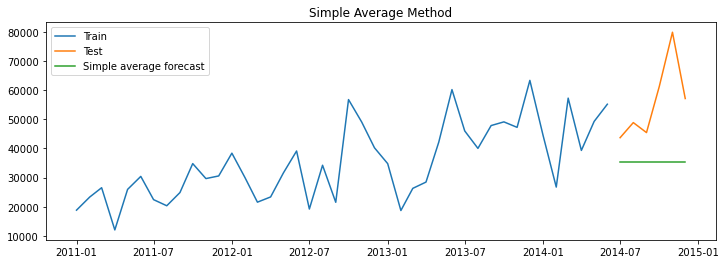

In [42]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

##### Observation:
- Forecast of months from 2014-07 to 2015-01 = Average of all past months’ sales
- Green line is the average of all the 42 months sales data
- The green line we forecasted is not showing any trend or seasonality while our train and test data had both trend and seasonality.

In [43]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


#### Simple moving average method
Forecast = Average of only the last few observations to forecast the future
- Reduces unsystematic noise in the data

In [44]:
y_hat_sma = df3.copy()
ma_window = 3  # Considered 3 months window
y_hat_sma['sma_forecast'] = df3['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

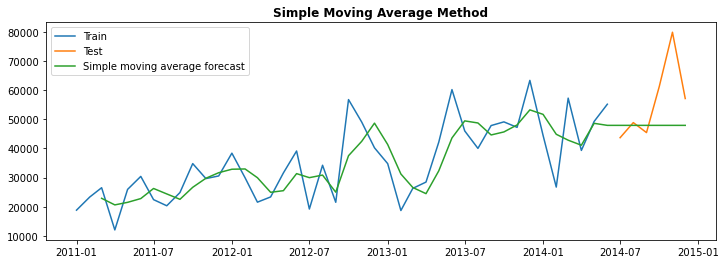

In [45]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

In [46]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82


### Exponential smoothing methods

#### Simple exponential smoothing
- The most recent period's demand multiplied by the smoothing factor.
- It is a time series forecasting method for univariate data without a trend or seasonality.
- The simple exponetial model captures the level of a time series.

In [47]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


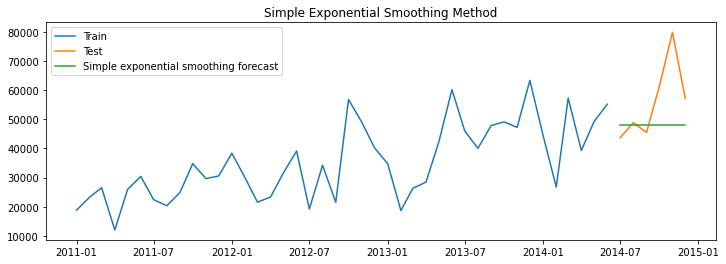

In [48]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

##### Observation:
The simple exponential model captured the level of a time series.

In [49]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14764.99,15.83


#### Holt's Exponential Smoothing
- Captures both level and trend of a time series in the forecast.

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


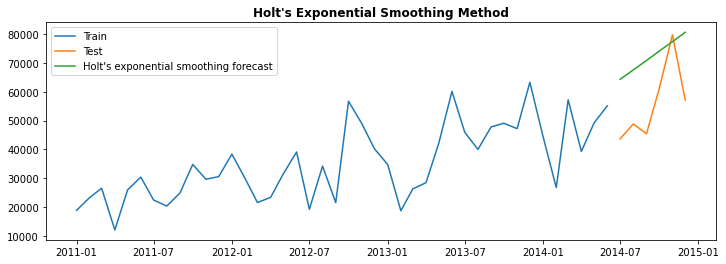

In [51]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method', fontweight='bold')
plt.show()

##### Observation:
The forecast is a straight line, sloping upwards as Holt's method captured both level and trend.

In [52]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14764.99,15.83
0,Holt's exponential smoothing method,18976.37,34.57


#### Holt Winters' additive method with trend and seasonality
Forecasts based on level, trend and seasonality of a time series

In [53]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 8.58497829766376e-06, 'smoothing_slope': 8.579246752800635e-06, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 30783.848963397995, 'initial_slope': 680.2024129045031, 'initial_seasons': array([ -9867.07517641, -19046.00125136, -11814.92051827, -20047.35953459,
        -9113.76381347,  -1078.02837652, -14071.87082951, -13066.25564771,
       -13023.2734183 ,    979.95598085,  -4544.22196401,  -2706.83760162]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


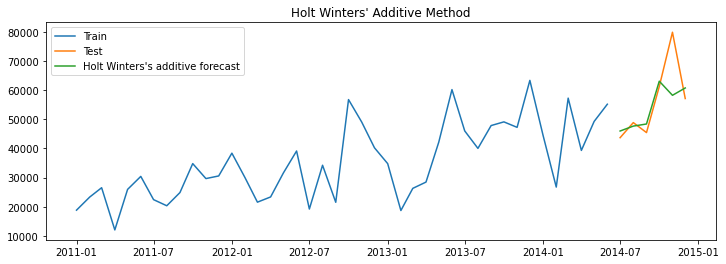

In [54]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

##### Observation:
Here, we are able to capture good amount of seasonal variation and the trend.

In [55]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14764.99,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9124.30,8.44


##### Observation:
It has the lowest RMSE and MAPE values, i.e., error measures are very less in this model.

#### Holt Winter's multiplicative method with trend and seasonality
Forecast = Multiplies the trend forecast by the seasonality

In [56]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 2.0949972951717164e-05, 'smoothing_slope': 2.0948885385221942e-05, 'smoothing_seasonal': 6.335372921928027e-05, 'damping_slope': nan, 'initial_level': 34110.96532709262, 'initial_slope': 730.4170032426728, 'initial_seasons': array([0.71595086, 0.486236  , 0.68241671, 0.53178244, 0.73827221,
       0.90176281, 0.62434417, 0.65680052, 0.64910195, 0.93228187,
       0.82816616, 0.88509632]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


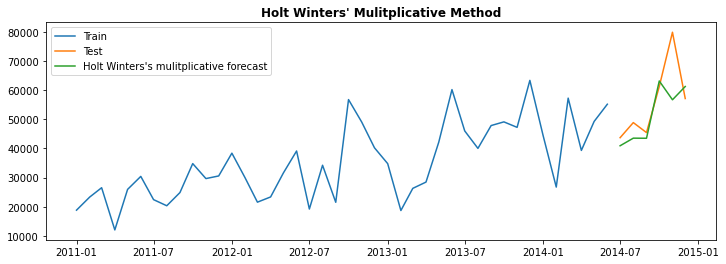

In [57]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

In [58]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14764.99,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9124.30,8.44
0,Holt Winters' multiplicative method,9972.29,10.15


##### Observation:
- Thus, the Holt Winter's Additive Method is giving the better forecast of the sales for the 6 months, since the predicted sales are closer to the actual sales.
- Also, its RMSE and MAPE values are the least among all the methods used.

### Auto Regressive methods

In an autoregressive model we forecast future observations using a linear combination of past observations of the same variable.

#### Stationarity vs non-stationary time series

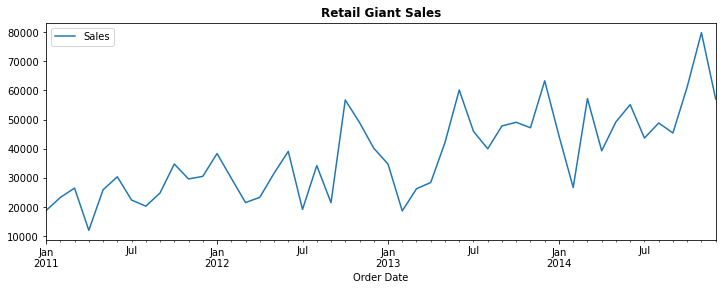

In [59]:
df3['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

#### Augmented Dickey-Fuller (ADF) test

Null Hypothesis  (H0) : The series is not stationary p-value > 0.05

Alternate Hypothesis (H1) : The series is stationary p-value <= 0.05

In [60]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df3['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


##### Observation:
- As the p-value is 0.011(<0.05), the series is stationary. So, we reject the null hypothesis (𝐻0).

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

Null Hypothesis (H0) : The series is stationary p-value > 0.05

Alternate Hypothesis (H1) : The series is not stationary p-value <= 0.05

In [61]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df3['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


##### Observation:
- As the p-value is 0.024 < 0.05, the series is not Stationary.

Based upon the significance level of 0.05 and the p-value of KPSS test, there is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test.

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

- Case 1: Both tests conclude that the series is not stationary - The series is not stationary
- Case 2: Both tests conclude that the series is stationary - The series is stationary
- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

Here, due to the difference in the results from ADF test and KPSS test, it can be inferred that the series is trend stationary and not strict stationary. The series can be detrended by differencing or by model fitting.

__The two tools to convert a non-stationary series into stationary series are as follows:__

- Differencing
- Transformation

#### Box Cox transformation to make variance constant
- Box-Cox Transformation makes the variance constant in a Time series.

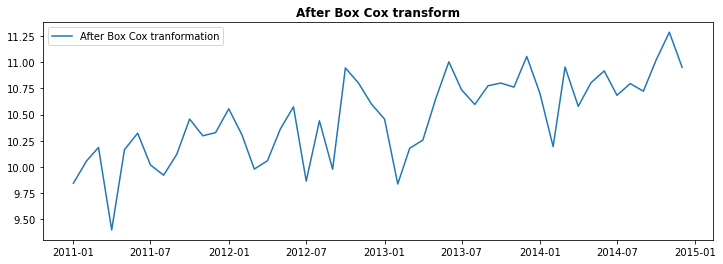

In [62]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df3['Sales'], lmbda=0), index = df3.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

__Differencing to remove trend__
- Differencing is performed by subtracting the previous observation from the current observation.
- Differencing can remove both Trend and seasonality in a Time series.

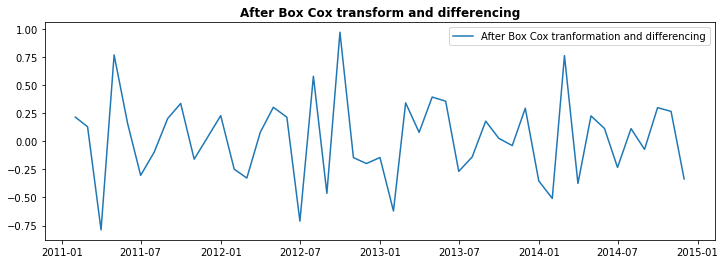

In [63]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df3.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

##### Observation:
- The series looks Stationary
- The fluctuations are under constant limits
- The mean is also centered around zero

In [64]:
data_boxcox_diff.dropna(inplace=True)

In [65]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

__Augmented Dickey-Fuller (ADF) test__

In [66]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


##### Observation:
- The p-value is 0.0001 (< 0.05), so we reject the null hypothesis (H0). The series is stationary.

__Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test__

In [67]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


##### Observation:
- The p-value is 0.100 (>= 0.05), so we fail to reject the null hypothesis (H0). The series is stationary.

__Thus after performing the Stationarity Tests we can see that we are able to convert a non-stationary series into a stationary series to build an Auto Regressive model.__

In [68]:
# Train Test split after box-cox transformation
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

__We can directly use p=1, q=1 and d=1 as the forecasts are relatively better for these values.__

### Auto Regression (AR) method

- It models the future observation as a linear regression of one or more past observations.
- The parameter of the autoregressive model 'p' is calculated from the Partial Autocorrelation Function plot.
- The value of p is the highest lag where partial autocorrelation is significantly high.
- Here, p value has been defaulted as 1. 

In [69]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [70]:
# Recovering original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

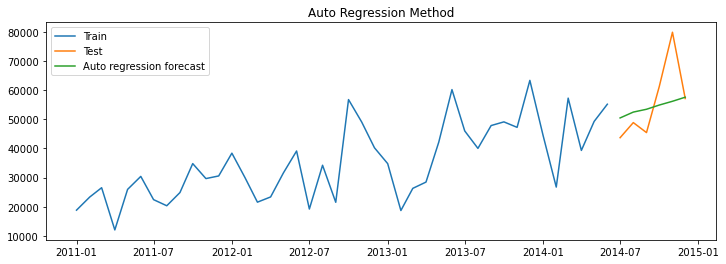

In [71]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

##### Observation:
- As per the plot we are able to capture trend in the forecast but not the seasonality.

In [72]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14764.99,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9124.30,8.44
0,Holt Winters' multiplicative method,9972.29,10.15
0,Autoregressive (AR) method,10985.28,13.56


##### Observation:
- The RMSE and MAPE values are slightly high again.

### Moving Average (MA) method

- The Moving Average Model models the future forecasts using past forecast errors in a regression-like model.
- This model has a parameter ‘q’ called window size over which linear combination of errors are calculated.
- q is calculated from the Autocorrelation function plot. The value of q is selected as the highest lag beyond which autocorrelation dies down.
- Here, q value has been defaulted as 1.

In [73]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [74]:
# Recovering original time series
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

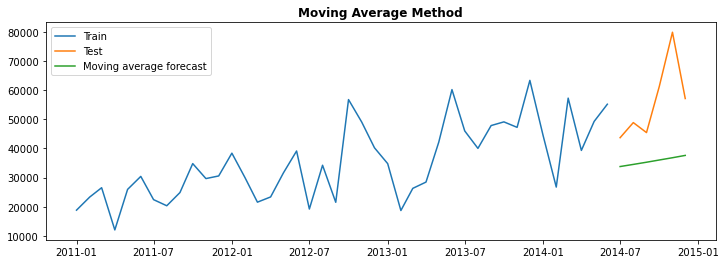

In [75]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(df3['Sales'][:train_len], label='Train')
plt.plot(df3['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()

##### Observation:
We are able to capture trend but not seasonality in the forecast

In [76]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14764.99,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9124.30,8.44
0,Holt Winters' multiplicative method,9972.29,10.15
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


##### Observation:
- The RMSE and MAPE values are high which means too many errors.

### Auto Regression Moving Average (ARMA) method 

- A time series that exhibits the characteristics of AR(p) and/or MA(q) process can be modelled using an ARMA(p,q) model
- It models the future observation as linear regression of one or more past observations and past forecast errors.

In [77]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [78]:
# Recovering original time series
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

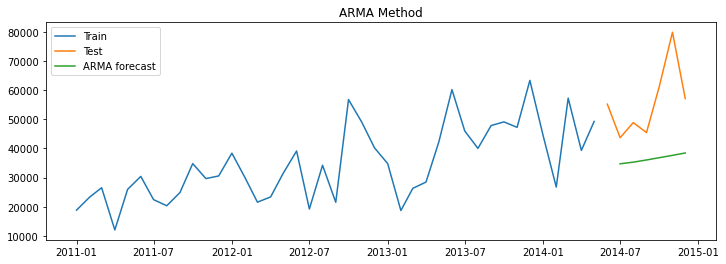

In [79]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(df3['Sales'][:train_len-1], label='Train')
plt.plot(df3['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

##### Observation:
- ARMA model captured Trend but no seasonality

In [80]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14764.99,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9124.30,8.44
0,Holt Winters' multiplicative method,9972.29,10.15
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


##### Observation:
- We have high values for MAPE and RMSE.

### Auto Regressive Integrated Moving Average (ARIMA)

ARIMA model has three parameters
- p: Highest lag included in the regression model
- d: Degree of differencing to make the series stationary
- q: Number of past error terms included in the regression model

'd' is the differencing parameter. If d is 1, that means the series now has slope 0 and thus will have no trend. That means, the time series initially had trend.

In [81]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))# p,d,q
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [82]:
# Recovering original time series
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

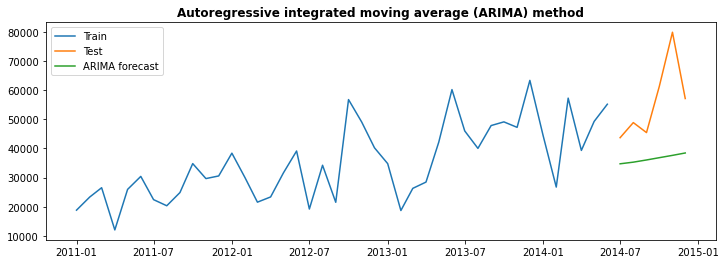

In [83]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

In [84]:
# Calculating the RMSE and MAPE values
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14764.99,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9124.30,8.44
0,Holt Winters' multiplicative method,9972.29,10.15
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### Seasonal Auto Regressive Integrated Moving Average (SARIMA)

- SARIMA Model has both non seasonal elements and seasonal elements.
- SARIMA brings all the features of an ARIMA model with an extra feature - seasonality.
- SARIMA has six parameters along with seasonality.

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/shenazrahaman/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      -0.041712
ma.L1      -0.997595
ar.S.L12    0.100136
ma.S.L12   -0.977132
sigma2      0.057914
dtype: float64


In [86]:
# Recovering original time series
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

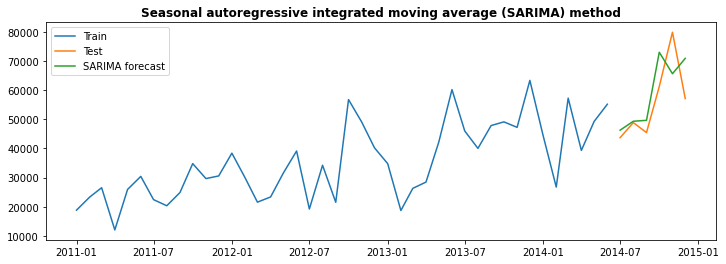

In [87]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

##### Observation:
- The forecast captured both trend and seasonality.

In [88]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14764.99,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9124.30,8.44
0,Holt Winters' multiplicative method,9972.29,10.15
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


##### Observation:
- Among all the methods done in the ARIMA above, we can conclude that forecast done using SARIMA method is able to predict the sales closer to the actual values.
- RMSE and MAPE values for this method is the least among all the methods done.

### 6. Conclusion

Thus, we can conclude that:
- Holt Winters additive method is the best forecasting method in the smoothing technique.
- Seasonal Autoregressive Integrated moving average (SARIMA) is the best method in ARIMA set of techniques.